# 一维傅里叶变换

最近在研究如何分析一维曲线的波动情况。如何定义波动见仁见智。我先定义什么叫完美的波动。

事实上，我可以认为正弦/余弦函数即为完美的波动。如果我将正弦/余弦的波动性定义为1，那么其它曲线越与正余弦函数相似，其波动性越接近于1，反之越接近于0。事实上，傅里叶变换即可近似地做到这一点。下面是我的尝试。

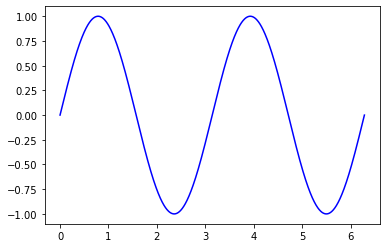

In [30]:
import numpy as np
import matplotlib.pyplot as plt

A = 1       # A为振幅。我们希望波动性与振幅无关
n = 2       # 基频倍数。我们希望波动性与波动周期也无关
t = np.linspace(0, 2*np.pi, 1000)
x = A * np.sin(n*t)

plt.plot(t, x, 'b-')
plt.show()

最大频谱能量位置:2, 最大频谱能量为：0.9752799350673153


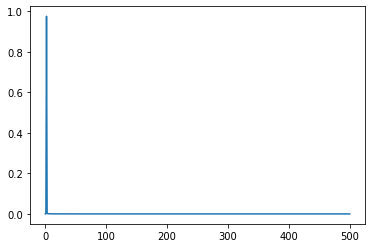

In [31]:
def my_fft(x):
    """
    计算信号的傅里叶变化，返回其能量谱
    :param x: 信号
    :return: 能量谱
    """
    half_ppv = (np.max(x) - np.min(x))/2
    fourier_transform = np.fft.rfft(x)
    power_specturm = np.abs(fourier_transform)/len(x)  # 注意要除以信号长度以及幅值
    power_specturm = power_specturm / np.sum(power_specturm)
    id = np.argmax(power_specturm)
    print(f"最大频谱能量位置:{id}, 最大频谱能量为：{power_specturm[id]}")
    plt.plot(power_specturm)
    plt.show()
    return power_specturm

y = my_fft(x)

可以看到，最大频谱所处的位置为2(从0开始计数), 这对应了基频倍数。可以看到此时的最大频谱能量为0.5。由于我们希望波动性为1，因此定义波动性为:

最大频谱能量位置:2, 最大频谱能量为：0.9752799350673136


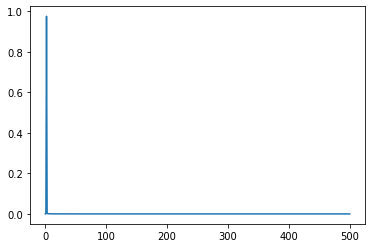

wave coeff: 1.95


In [22]:
def wave_coeff(x) -> float:
    return 2*np.max(my_fft(x))

wc = wave_coeff(x)
print(f"wave coeff: {wc:.2f}")

下面来验证，幅值A和基频倍数n是否对波动性没有影响。

最大频谱能量位置:2, 最大频谱能量为：0.9752799350673168


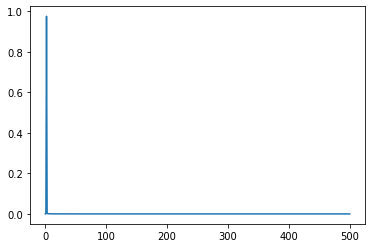

wave coeff: 1.95


In [23]:
A = 3
n = 2
x = A * np.sin(n*t)
wc = wave_coeff(x)
print(f"wave coeff: {wc:.2f}")

最大频谱能量位置:3, 最大频谱能量为：0.9633262861660633


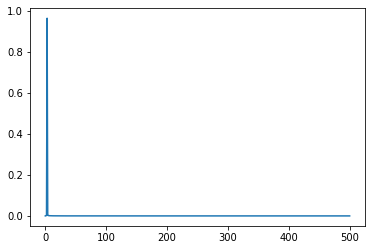

wave coeff: 1.93


In [24]:
A = 2
n = 3
x = A * np.sin(n*t)
wc = wave_coeff(x)
print(f"wave coeff: {wc:.2f}")

可以看到，最大频谱能量的位置发生的变化，但是最大频谱能量没有发生变化；波动系数也未发生变化。

那么，如果是一个方波，会造成什么样的影响呢？

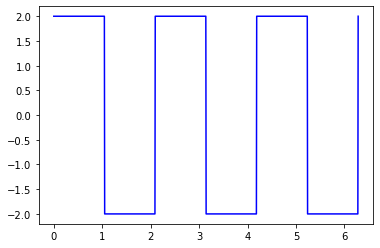

In [25]:
from scipy import signal
x = A * signal.square(n*t)
plt.plot(t, x, 'b-')
plt.show()

最大频谱能量位置:3, 最大频谱能量为：0.2273074053464542


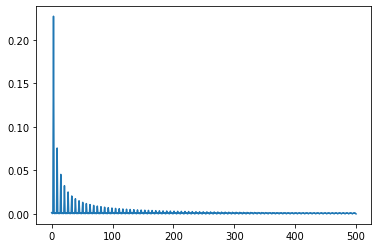

最大频谱能量位置:3, 最大频谱能量为：0.2273074053464542


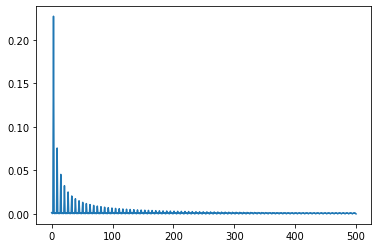

wave coeff: 0.45


In [26]:
y = my_fft(x)
wc = wave_coeff(x)
print(f"wave coeff: {wc:.2f}")